# Титульный лист

## Отчет по заданию

**Студент: Ким Игорь Геннадьевич**

**Дата: 13/02/25**

**Тема: Сравнение гемодинамических показателей при галотановой и морфиновой анестезии**

# Анализ гемодинамических показателей при галотановой и морфиновой анестезии

В данном ноутбуке проводится описательный анализ данных, проверка гипотез о нормальности распределения и тестирование гипотез о статистически значимых различиях между группами.

**Нулевая гипотеза (H₀):** отсутствует статистически значимая разница между группами по показателям.

**Альтернативная гипотеза (H₁):** существует статистически значимая разница между группами по показателям.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import io

%matplotlib inline


In [ ]:
# Чтение данных из многострочной строки
data = """Пациент	Среднее артериальное давление	Общее периферическое сосудистое сопротивление	Препарат
1	83	1600	Галотан
2	76	2000	Галотан
3	75	2200	Галотан
4	86	2200	Галотан
5	75	2300	Галотан
6	81	1900	Галотан
7	79	2400	Галотан
8	84	1600	Галотан
9	81	1800	Галотан
10	74	2000	Галотан
11	85	1700	Галотан
12	86	2200	Галотан
13	84	2000	Галотан
14	78	1700	Галотан
15	73	2200	Галотан
16	72	1900	Галотан
17	81	1700	Галотан
18	79	2200	Галотан
19	74	2200	Галотан
20	83	2400	Галотан
21	83	1700	Галотан
22	86	2300	Галотан
23	78	1700	Галотан
24	77	2300	Галотан
25	82	2600	Галотан
26	82	1600	Галотан
27	84	1600	Галотан
28	80	2300	Галотан
29	86	1700	Галотан
30	77	2500	Галотан
31	73	2100	Галотан
32	85	2500	Галотан
33	86	2600	Галотан
34	81	2500	Галотан
35	76	2500	Галотан
36	81	2000	Галотан
37	73	2400	Галотан
38	72	1900	Галотан
39	72	2200	Галотан
40	79	2500	Галотан
41	95	2500	Морфин
42	99	3100	Морфин
43	92	2200	Морфин
44	100	3100	Морфин
45	98	3200	Морфин
46	90	2400	Морфин
47	92	2400	Морфин
48	87	3100	Морфин
49	94	3100	Морфин
50	85	2500	Морфин
51	100	2900	Морфин
52	85	2400	Морфин
53	98	3000	Морфин
54	89	2300	Морфин
55	85	2800	Морфин
56	100	2600	Морфин
57	87	2800	Морфин
58	93	2800	Морфин
59	97	2500	Морфин
60	93	2700	Морфин
61	91	2300	Морфин
62	100	2800	Морфин
63	89	2200	Морфин
64	89	2400	Морфин
65	92	2700	Морфин
66	97	2200	Морфин
67	98	2800	Морфин
68	89	3000	Морфин
69	86	2300	Морфин
70	98	3000	Морфин
71	91	2300	Морфин
72	91	3200	Морфин
73	87	2200	Морфин
74	98	2200	Морфин
75	93	2300	Морфин
76	95	3100	Морфин
77	96	2800	Морфин
78	92	2200	Морфин
79	90	3000	Морфин
80	100	3000	Морфин
81	68	2300	Галотан
82	73	2400	Галотан
83	84	2000	Галотан
84	71	2100	Галотан
85	87	1700	Галотан
86	74	1800	Галотан
87	71	2500	Галотан
88	84	2200	Галотан
89	74	2200	Галотан
90	73	2300	Галотан
91	66	1700	Галотан
92	92	1700	Галотан
93	86	2000	Галотан
94	71	2100	Галотан
95	66	2600	Галотан
96	66	1700	Галотан
97	81	1800	Галотан
98	65	2000	Галотан
99	85	2200	Галотан
100	82	1700	Галотан
101	91	2500	Галотан
102	78	2200	Галотан
103	80	2500	Галотан
104	89	2100	Галотан
105	73	2200	Галотан
106	88	2700	Галотан
107	84	2600	Галотан
108	85	2100	Галотан
109	88	2300	Галотан
110	83	2400	Галотан
111	66	1900	Галотан
112	85	2200	Галотан
113	66	2300	Галотан
114	70	2400	Галотан
115	82	2400	Галотан
116	73	2700	Галотан
117	72	2700	Галотан
118	90	2100	Галотан
119	74	2400	Галотан
120	75	1700	Галотан
121	101	3300	Галотан
122	102	2700	Морфин
123	105	3200	Морфин
124	102	2500	Морфин
125	88	2400	Морфин
126	100	2600	Морфин
127	103	3200	Морфин
128	88	3200	Морфин
129	92	2400	Морфин
130	100	2700	Морфин
131	101	2700	Морфин
132	102	2400	Морфин
133	105	3200	Морфин
134	88	2600	Морфин
135	97	2800	Морфин
136	95	2400	Морфин
137	99	3100	Морфин
138	86	2400	Морфин
139	86	3300	Морфин
140	95	2900	Морфин
141	105	2600	Морфин
142	97	2900	Морфин
143	94	2400	Морфин
144	86	2300	Морфин
145	88	2900	Морфин
146	97	2800	Морфин
147	94	3100	Морфин
148	100	2400	Морфин
149	102	2900	Морфин
150	97	3200	Морфин
151	90	3000	Морфин
152	95	3000	Морфин
153	89	2600	Морфин
154	91	2800	Морфин
155	94	2900	Морфин
156	103	3300	Морфин
157	94	2600	Морфин
158	100	2300	Морфин
159	89	2800	Морфин
160	85	2300	Морфин
161	82	2000	Галотан
162	84	2400	Галотан
163	87	2100	Галотан
164	74	1800	Галотан
165	79	2200	Галотан
166	77	2600	Галотан
167	75	2100	Галотан
168	73	2300	Галотан
169	80	1900	Галотан
170	80	2100	Галотан
171	83	2100	Галотан
172	82	2000	Галотан
173	71	2000	Галотан
174	72	2300	Галотан
175	74	2500	Галотан
176	75	2600	Галотан
177	83	2300	Галотан
178	83	2600	Галотан
179	87	1900	Галотан
180	80	2000	Галотан
181	85	1800	Галотан
182	86	1800	Галотан
183	81	2500	Галотан
184	86	2500	Галотан
185	71	2600	Галотан
186	73	2200	Галотан
187	83	2000	Галотан
188	81	2100	Галотан
189	77	1600	Галотан
190	76	1600	Галотан
191	72	2300	Галотан
192	84	1600	Галотан
193	83	1900	Галотан
194	87	2400	Галотан
195	81	1700	Галотан
196	73	2500	Галотан
197	84	1900	Галотан
198	76	2400	Галотан
199	84	2100	Галотан
200	76	1600	Галотан
201	87	2200	Галотан
202	85	3100	Галотан
203	90	2900	Морфин
204	95	3000	Морфин
205	99	3200	Морфин
206	89	2400	Морфин
207	100	3100	Морфин
208	88	3100	Морфин
209	101	2900	Морфин
210	100	2600	Морфин
211	101	2900	Морфин
212	92	3200	Морфин
213	90	2700	Морфин
214	94	2800	Морфин
215	101	3100	Морфин
216	93	2300	Морфин
217	96	3000	Морфин
218	100	2900	Морфин
219	100	2400	Морфин
220	87	2600	Морфин
221	99	2600	Морфин
222	86	2400	Морфин
223	93	2800	Морфин
224	92	2900	Морфин
225	99	2700	Морфин
226	86	3000	Морфин
227	91	2400	Морфин
228	89	2700	Морфин
229	89	3000	Морфин
230	90	3200	Морфин
231	92	2900	Морфин
232	94	2200	Морфин
233	100	2900	Морфин
234	98	2300	Морфин
235	86	3200	Морфин
236	92	2300	Морфин
237	90	2200	Морфин
238	90	2900	Морфин
239	96	2400	Морфин
240	98	3200	Морфин
"""

df = pd.read_csv(io.StringIO(data), sep='\t')

print(df.head())
print(df.tail())

   Пациент  Среднее артериальное давление  \
0        1                             83   
1        2                             76   
2        3                             75   
3        4                             86   
4        5                             75   

   Общее периферическое сосудистое сопротивление Препарат  
0                                           1600  Галотан  
1                                           2000  Галотан  
2                                           2200  Галотан  
3                                           2200  Галотан  
4                                           2300  Галотан  
     Пациент  Среднее артериальное давление  \
235      236                             92   
236      237                             90   
237      238                             90   
238      239                             96   
239      240                             98   

     Общее периферическое сосудистое сопротивление Препарат  
235                     

## Описательный анализ данных

In [ ]:
# Описательный анализ данных для каждой группы

for group, data_group in df.groupby('Препарат'):
  print(f"\nГруппа: {group}")
  for col in ['Среднее артериальное давление', 'Общее периферическое сосудистое сопротивление']:
    mean_val = data_group[col].mean()
    std_val = data_group[col].std(ddof=1)
    var_val = data_group[col].var(ddof=1)
    median_val = data_group[col].median()
    mode_val = data_group[col].mode()[0]
    q1 = data_group[col].quantile(0.25)
    q3 = data_group[col].quantile(0.75)
    print(f"{col}:")
    print(f"  Среднее = {mean_val:.2f}, Стандартное отклонение = {std_val:.2f}, Дисперсия = {var_val:.2f}")
    print(f"  Медиана = {median_val}, Мода = {mode_val}, Q1 = {q1}, Q3 = {q3}")


Группа: Галотан
Среднее артериальное давление:
  Среднее = 79.24, Стандартное отклонение = 6.50, Дисперсия = 42.31
  Медиана = 80.0, Мода = 73, Q1 = 74.0, Q3 = 84.0
Общее периферическое сосудистое сопротивление:
  Среднее = 2151.22, Стандартное отклонение = 336.41, Дисперсия = 113174.73
  Медиана = 2200.0, Мода = 2200, Q1 = 1900.0, Q3 = 2400.0

Группа: Морфин
Среднее артериальное давление:
  Среднее = 94.11, Стандартное отклонение = 5.39, Дисперсия = 29.10
  Медиана = 94.0, Мода = 100, Q1 = 90.0, Q3 = 99.0
Общее периферическое сосудистое сопротивление:
  Среднее = 2730.77, Стандартное отклонение = 326.02, Дисперсия = 106286.47
  Медиана = 2800.0, Мода = 2400, Q1 = 2400.0, Q3 = 3000.0


## Проверка гипотезы о нормальном распределении

In [ ]:
# Проверка нормальности распределения с помощью теста Шапиро-Уилка

for group, data_group in df.groupby('Препарат'):
  for col in ['Среднее артериальное давление', 'Общее периферическое сосудистое сопротивление']:
    stat, p = stats.shapiro(data_group[col])
    print(f"Тест Шапиро-Уилка для {col} в группе {group}: статистика = {stat:.4f}, p-значение = {p:.4f}")
    if p > 0.05:
      print("  Распределение можно считать нормальным.")
    else:
      print("  Распределение не является нормальным.")

Тест Шапиро-Уилка для Среднее артериальное давление в группе Галотан: статистика = 0.9707, p-значение = 0.0088
  Распределение не является нормальным.
Тест Шапиро-Уилка для Общее периферическое сосудистое сопротивление в группе Галотан: статистика = 0.9615, p-значение = 0.0014
  Распределение не является нормальным.
Тест Шапиро-Уилка для Среднее артериальное давление в группе Морфин: статистика = 0.9583, p-значение = 0.0011
  Распределение не является нормальным.
Тест Шапиро-Уилка для Общее периферическое сосудистое сопротивление в группе Морфин: статистика = 0.9355, p-значение = 0.0000
  Распределение не является нормальным.


## Проверка гипотез о статистически значимых различиях между группами

In [ ]:
# Проведение t-теста для независимых выборок для каждого показателя

for col in ['Среднее артериальное давление', 'Общее периферическое сосудистое сопротивление']:
  group1 = df[df['Препарат'] == 'Галотан'][col]
  group2 = df[df['Препарат'] == 'Морфин'][col]
  # Применяем t-тест для независимых выборок (Welch's t-test)
  stat, p = stats.ttest_ind(group1, group2, equal_var=False)
  print(f"t-тест для {col}: статистика = {stat:.4f}, p-значение = {p:.4f}")
  if p < 0.05:
    print("  Различия статистически значимы.")
  else:
    print("  Различия статистически не значимы.")

t-тест для Среднее артериальное давление: статистика = -19.3215, p-значение = 0.0000
  Различия статистически значимы.
t-тест для Общее периферическое сосудистое сопротивление: статистика = -13.5531, p-значение = 0.0000
  Различия статистически значимы.


## Визуализация результатов

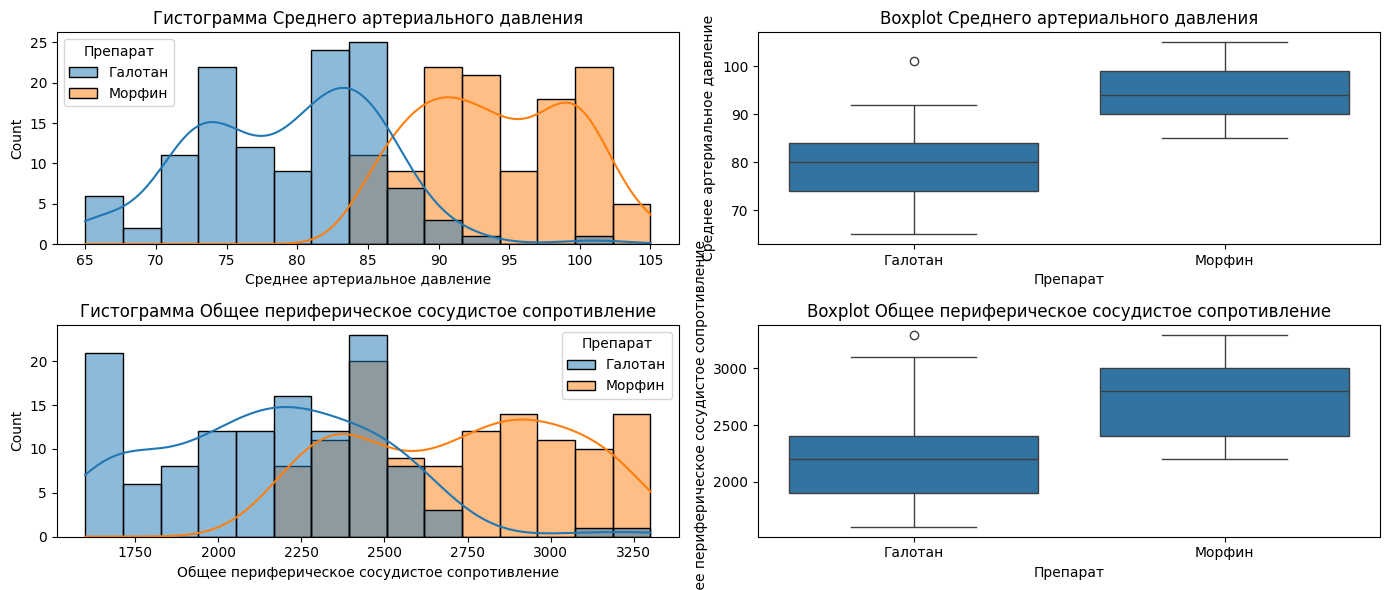

In [ ]:
# Гистограммы и boxplot для каждого показателя по группам

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Среднее артериальное давление', hue='Препарат', bins=15, kde=True)
plt.title('Гистограмма Среднего артериального давления')

plt.subplot(2, 2, 2)
sns.boxplot(x='Препарат', y='Среднее артериальное давление', data=df)
plt.title('Boxplot Среднего артериального давления')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Общее периферическое сосудистое сопротивление', hue='Препарат', bins=15, kde=True)
plt.title('Гистограмма Общее периферическое сосудистое сопротивление')

plt.subplot(2, 2, 4)
sns.boxplot(x='Препарат', y='Общее периферическое сосудистое сопротивление', data=df)
plt.title('Boxplot Общее периферическое сосудистое сопротивление')

plt.tight_layout()
plt.show()


# **Выводы**

На основании проведенного анализа можно сделать следующие выводы:

- Тест Шапиро‑Уилка показал, что распределения данных по показателям не являются нормальными, что обосновано применением Welch's t‑test для независимых выборок.
- Проведённый t‑тест выявил статистически значимые различия между группами по обоим показателям:
  - Среднее артериальное давление значительно выше при морфиновой анестезии (p < 0.05).
  - Общее периферическое сосудистое сопротивление также демонстрирует статистически значимые различия между группами (p < 0.05).
- Таким образом, результаты анализа позволяют заключить, что гемодинамические показатели, а именно среднее артериальное давление и общее периферическое сосудистое сопротивление, существенно различаются при применении галотановой и морфиновой анестезии.

Используемые статистические методы:
- Тест Шапиро‑Уилка для проверки нормальности распределения данных.
- t‑тест для независимых выборок (Welch's t‑test) для оценки статистически значимых различий между группами.